In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import zipfile
zf = zipfile.ZipFile("/gdrive/My Drive/additional/train.zip")
zf.extractall("dogcat")

In [0]:
import pandas as pd
import glob
catdf = pd.DataFrame()
fn = glob.glob("dogcat/train/cat.*.jpg")
catdf["path"] = fn
catdf["target"] = 0
dogdf = pd.DataFrame()
fn = glob.glob("dogcat/train/dog.*.jpg")
dogdf["path"] = fn
dogdf["target"] = 1
df = pd.concat([catdf, dogdf], axis=0, ignore_index=True)
df

In [0]:
# Dense() -> 算式
# 算式(tensor) -> tensor
# 最後: Model(input tensor, output tensor)
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
x = Flatten()(vgg.output)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

In [15]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import numpy as np
x = np.array(df["path"])
y = np.array(df["target"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train_cat[0])

[0. 1.]


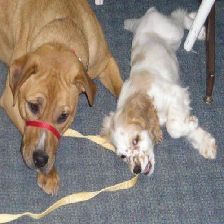

In [18]:
from keras.preprocessing.image import load_img
load_img(x_train[0], target_size=(224, 224))